In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.time_series import *
from statsmodels.tsa.seasonal import seasonal_decompose

In [276]:
df_first = pd.read_csv('data_preprocess\export-pm25_eng-1h.csv')

In [237]:
df = pd.read_csv('data_preprocess\export-pm25_eng-1h.csv')

In [238]:
df.drop(columns=['Unnamed: 0','pm_10','pm_2_5_sp','timezone'], inplace=True)
df.head()

,timestamp,humidity,pm_2_5,temperature
0,2023-03-31 22:00:00,62.659563,4.727273,27.147784
1,2023-04-02 18:00:00,69.995698,7.142857,32.246966
2,2023-04-02 19:00:00,65.608215,7.800000,32.518829
3,2023-04-02 20:00:00,65.489705,8.266667,31.864227
4,2023-04-02 21:00:00,65.811462,9.083333,31.412888


In [239]:
df.describe()

,humidity,pm_2_5,temperature
count,14792.000000,14796.000000,14792.000000
mean,78.569546,21.195438,29.699716
std,13.272735,13.095585,4.760888
min,39.496231,1.421053,20.419051
25%,67.330850,11.233333,26.383601
50%,80.051360,18.848870,28.508779
75%,89.818908,29.450000,31.404870
max,100.000000,184.366667,52.070282


In [240]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14796 entries, 0 to 14795
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    14796 non-null  datetime64[ns]
 1   humidity     14792 non-null  float64       
 2   pm_2_5       14796 non-null  float64       
 3   temperature  14792 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 462.5 KB


In [241]:
df.set_index('timestamp', inplace=True)

In [242]:
df.index.to_series().diff().value_counts()

timestamp
0 days 01:00:00     14646
0 days 10:00:00        29
0 days 09:00:00        28
0 days 07:00:00        26
0 days 08:00:00        23
0 days 06:00:00         9
0 days 02:00:00         5
0 days 05:00:00         5
0 days 04:00:00         5
0 days 03:00:00         4
0 days 12:00:00         3
0 days 13:00:00         2
0 days 15:00:00         2
0 days 22:00:00         1
0 days 11:00:00         1
1 days 20:00:00         1
0 days 16:00:00         1
0 days 14:00:00         1
4 days 17:00:00         1
16 days 10:00:00        1
0 days 00:15:36         1
Name: count, dtype: int64

In [243]:
df.isna().sum()

humidity       4
pm_2_5         0
temperature    4
dtype: int64

In [244]:
df.dropna(inplace=True)

<Axes: >

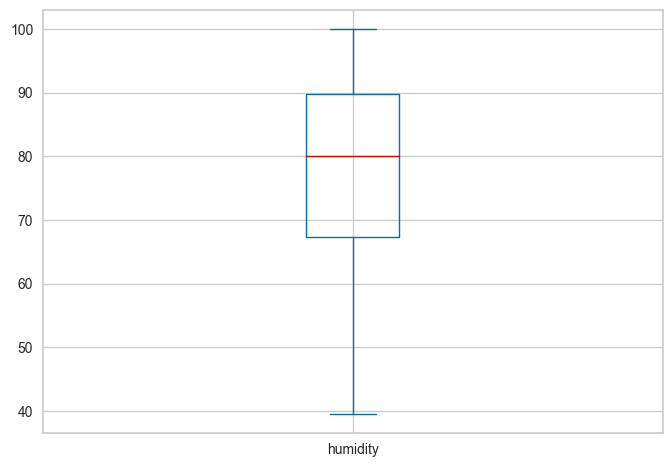

In [245]:
df['humidity'].plot(kind='box')  # ดูค่าผิดปกติด้วย Box Plot

<Axes: >

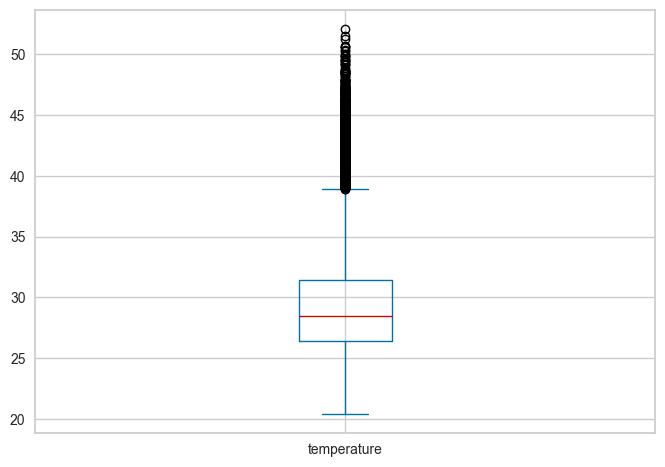

In [246]:
df['temperature'].plot(kind='box')  # ดูค่าผิดปกติด้วย Box Plot

<Axes: >

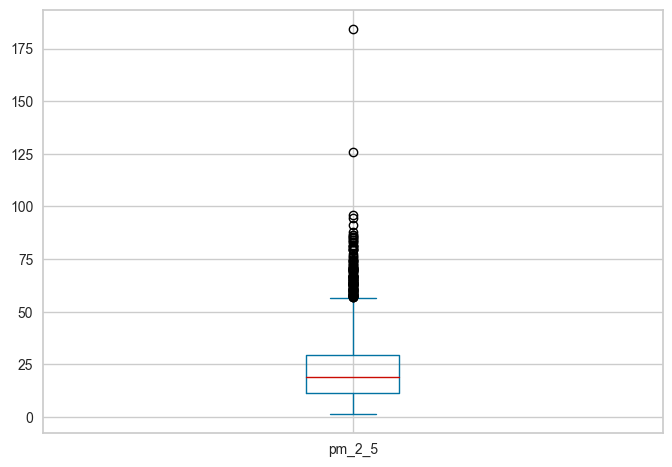

In [247]:
df['pm_2_5'].plot(kind='box')  # ดูค่าผิดปกติด้วย Box Plot

In [248]:
from scipy import stats

In [249]:
df = df[(np.abs(stats.zscore(df['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

<Axes: >

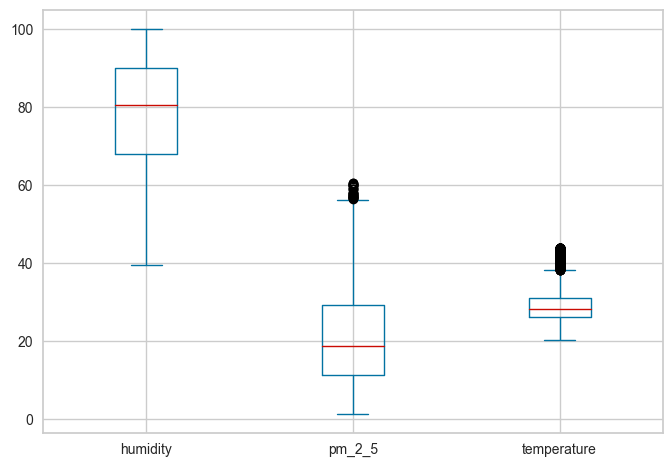

In [250]:
df.plot(kind='box')  # ดูค่าผิดปกติด้วย Box Plot

In [251]:
# ทำ Seasonal Decomposition
result = seasonal_decompose(df['pm_2_5'], model='additive', period=30)
df['trend'] = result.trend

<Axes: xlabel='timestamp'>

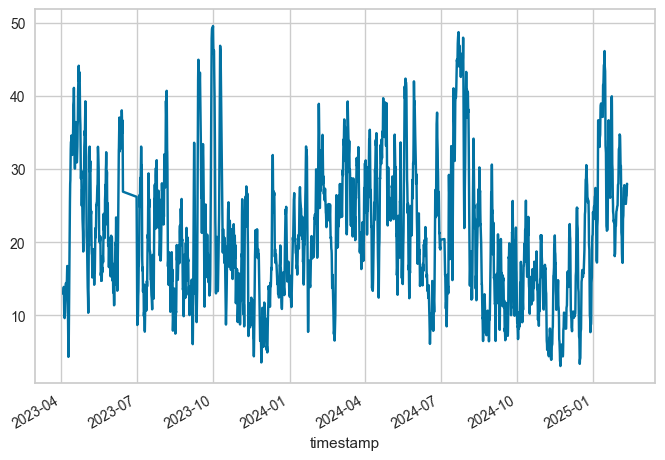

In [252]:
df['trend_smoothed'] = df['trend'].rolling(window=7, min_periods=1).mean()
df['trend_smoothed'].plot()

In [253]:
df = df[~df.index.duplicated(keep='first')]  # ลบข้อมูลที่ซ้ำ
df.isna().sum()

humidity           0
pm_2_5             0
temperature        0
trend             30
trend_smoothed    24
dtype: int64

In [254]:
df['trend_smoothed'] = df['trend_smoothed'].fillna(method='bfill')  # แทนค่า NaN ด้วยค่าก่อนหน้า
df['trend'] = df['trend'].fillna(method='bfill')  # แทนค่า NaN ด้วยค่าก่อนหน้า
df.isna().sum()

humidity           0
pm_2_5             0
temperature        0
trend             15
trend_smoothed     9
dtype: int64

In [255]:
df.dropna(inplace=True)

In [256]:
df

,humidity,pm_2_5,temperature,trend,trend_smoothed
timestamp,,,,,
2023-03-31 22:00:00,62.659563,4.727273,27.147784,12.901291,12.901291
2023-04-02 18:00:00,69.995698,7.142857,32.246966,12.901291,12.901291
2023-04-02 19:00:00,65.608215,7.800000,32.518829,12.901291,12.901291
2023-04-02 20:00:00,65.489705,8.266667,31.864227,12.901291,12.901291
2023-04-02 21:00:00,65.811462,9.083333,31.412888,12.901291,12.901291
...,...,...,...,...,...
2025-02-10 08:00:00,86.918687,34.133333,24.275117,27.101738,26.488719
2025-02-10 09:00:00,74.612411,28.666667,27.176861,27.522049,26.704249
2025-02-10 10:00:00,65.961271,26.810345,29.180450,27.932882,26.974130


In [277]:
df

,humidity,pm_2_5,temperature,trend,trend_smoothed
timestamp,,,,,
2023-03-31 22:00:00,62.659563,4.727273,27.147784,12.901291,12.901291
2023-04-01 22:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-02 22:00:00,66.193542,9.366667,30.878464,12.901291,12.901291
2023-04-03 22:00:00,62.523092,6.216667,29.823547,12.091835,13.487259
2023-04-04 22:00:00,60.936483,9.200000,29.612396,9.940365,9.701138
...,...,...,...,...,...
2025-02-05 22:00:00,76.493067,23.687500,26.798183,24.500235,23.170633
2025-02-06 22:00:00,78.048604,23.210526,25.679936,27.575049,27.424336
2025-02-07 22:00:00,78.153030,28.269231,26.116187,25.918467,26.289430


In [258]:
# ตั้งค่าความถี่ของข้อมูล
# สมมติว่าข้อมูลของคุณเป็นรายวัน
df.index = pd.to_datetime(df.index)  # ตรวจสอบให้แน่ใจว่า index เป็น datetime
df = df.asfreq('D')  # 'D' คือความถี่รายวัน (Daily), สามารถเปลี่ยนเป็น 'H' สำหรับรายชั่วโมงหรือความถี่อื่น ๆ


In [282]:
# ใช้ PyCaret สำหรับ Time Series
s = setup(df, target='pm_2_5', session_id=123, fold=5,  seasonal_period=12,  
          numeric_imputation_target='mean',
          numeric_imputation_exogenous='mean',
          fh=7)  # กำหนดการ transform target เพื่อปรับค่าให้เหมาะสม

,Description,Value
0,session_id,123
1,Target,pm_2_5
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(682, 5)"
5,Transformed data shape,"(682, 5)"
6,Transformed train set shape,"(675, 5)"
7,Transformed test set shape,"(7, 5)"
8,Rows with missing values,4.5%
9,Fold Generator,ExpandingWindowSplitter


In [283]:
best_model = compare_models()  # เปรียบเทียบโมเดล

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.4882,0.4800,4.1904,5.5337,0.2062,0.1581,0.4987,0.1020
auto_arima,Auto ARIMA,0.4949,0.4858,4.2482,5.6007,0.2087,0.1597,0.4865,1.2180
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.5230,0.5096,4.4890,5.8744,0.2076,0.1683,0.4222,0.0580
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.5231,0.5097,4.4895,5.8754,0.2076,0.1683,0.4220,0.0500
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5266,0.5096,4.5197,5.8744,0.2094,0.1699,0.4117,0.0540
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5334,0.5247,4.5778,6.0484,0.2080,0.1712,0.3805,0.0480
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.5456,0.5322,4.6830,6.1350,0.2087,0.1744,0.3704,0.0480
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.5494,0.5375,4.7154,6.1966,0.2084,0.1750,0.3456,0.0520
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.5496,0.5378,4.7175,6.2001,0.2085,0.1751,0.3446,0.0640
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.5563,0.5468,4.7748,6.3033,0.2102,0.1773,0.3126,0.0680


In [261]:
best_model = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,0.7158,0.7092,6.1074,8.1490,0.2064,0.2248,0.0259
1,2025-01-05,0.3870,0.3247,3.3200,3.7443,0.0933,0.0903,0.7143
2,2025-01-12,0.6247,0.6956,5.3497,8.0009,0.5112,0.2501,0.7170
3,2025-01-19,0.4522,0.4215,3.9123,4.8889,0.1434,0.1449,0.6795
4,2025-01-26,0.2614,0.2491,2.2627,2.8856,0.0768,0.0802,0.3570
Mean,NaT,0.4882,0.4800,4.1904,5.5337,0.2062,0.1581,0.4987
SD,NaT,0.1633,0.1897,1.3834,2.1706,0.1590,0.0689,0.2722


In [267]:
predictions = predict_model(best_model, fh=7)
print(df.tail(7))
# ดูผลลัพธ์ที่ได้
print(predictions)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.4841,0.4482,4.1689,5.1716,0.1871,0.1776,-0.0036


                      humidity     pm_2_5  temperature      trend  \
timestamp                                                           
2025-02-03 22:00:00  80.627186  29.125000    26.310686  19.696525   
2025-02-04 22:00:00  79.676537  15.470588    26.282542  17.017578   
2025-02-05 22:00:00  76.493067  23.687500    26.798183  24.500235   
2025-02-06 22:00:00  78.048604  23.210526    25.679936  27.575049   
2025-02-07 22:00:00  78.153030  28.269231    26.116187  25.918467   
2025-02-08 22:00:00  74.631119  17.607143    26.404011  25.223003   
2025-02-09 22:00:00  79.079030  29.289474    26.410580  26.724349   

                     trend_smoothed  
timestamp                            
2025-02-03 22:00:00       21.326736  
2025-02-04 22:00:00       17.481817  
2025-02-05 22:00:00       23.170633  
2025-02-06 22:00:00       27.424336  
2025-02-07 22:00:00       26.289430  
2025-02-08 22:00:00       25.259796  
2025-02-09 22:00:00       26.214717  
             y_pred
2025-02-03  20.2

In [268]:
plot_model(best_model)